In [32]:
###################################################

#  Click on run all to run this entire notebook  #
# This includes DBSCAN based algorithm and query point based algorithm   #

##################################################



####  All the imports  ####

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os
import logging
import time
from scipy.sparse import csr_matrix

import networkx as nx
import pickle
from concurrent.futures import ThreadPoolExecutor
from sklearn.neighbors import NearestNeighbors

from torch.utils.data import Dataset
from torch.utils.data import TensorDataset, DataLoader

# file_path = '/kaggle/input/recohit-dataset-100/RecoOutPileup_TimeMod_uniform_1_100recohitfile.tsv'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model_path = "/kaggle/input/new-model-4dim/trained_full_model.pt"

import networkx as nx
from joblib import Parallel, delayed

import torch.optim as optim

from torch.utils.data import random_split

from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
folder_path = '/kaggle/working/embed_data'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
model_dir = "/kaggle/working/model"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save the figures in the "plots" folder
plots_dir = "/kaggle/working/plots"
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale

# test_embedded_points
import os

# Check if the directory already exists.
if not os.path.exists("/kaggle/working/experiment_dir"):

    os.makedirs("/kaggle/working/experiment_dir")
experiment_dir = "/kaggle/working/experiment_dir"

# Create the "embed_data" folder if it doesn't exist
folder_path = '/kaggle/working/embed_data'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
# model_path = '/kaggle/input/model-new-4d/trained_full_model.pt'
# if not os.path.exists(model_path):
#     os.makedirs(model_path)
    
# Save the figures in the "plots" folder
plots_dir = "/kaggle/working/plots"
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)
    
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
experiment_dir = '/kaggle/working/'

import torch
# from torch_geometric.nn import GCNConv
import networkx as nx
import numpy as np
from sklearn.neighbors import KDTree
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

import os
import pickle
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.cluster import DBSCAN
from collections import defaultdict
import time

import torch
from torch.utils.data import DataLoader, TensorDataset
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import networkx as nx
from collections import defaultdict
import pickle

/kaggle/input/gnn-model-2/trained_model.pth
/kaggle/input/modelupload/valid_epoch_model.pt
/kaggle/input/modelupload/evaluated_model.pt
/kaggle/input/modelupload/trained_model.pt
/kaggle/input/modelupload/trained_full_model.pt
/kaggle/input/model-gnn/gnn_model (1).pth
/kaggle/input/100-dataset/RecoOutPileup_TimeMod_uniform_1_100recohitfile.tsv
/kaggle/input/new-10000-dataset/RecoOutPileup_TimeMod_uniform_1_10000_16666_ns_recohitfile.tsv
/kaggle/input/new-model-4dim/evaluated_model.pt
/kaggle/input/new-model-4dim/trained_full_model.pt
/kaggle/input/gnn-model-2/trained_model.pth
/kaggle/input/modelupload/valid_epoch_model.pt
/kaggle/input/modelupload/evaluated_model.pt
/kaggle/input/modelupload/trained_model.pt
/kaggle/input/modelupload/trained_full_model.pt
/kaggle/input/model-gnn/gnn_model (1).pth
/kaggle/input/100-dataset/RecoOutPileup_TimeMod_uniform_1_100recohitfile.tsv
/kaggle/input/new-10000-dataset/RecoOutPileup_TimeMod_uniform_1_10000_16666_ns_recohitfile.tsv
/kaggle/input/new-m

In [33]:
!pip install torch_geometric

In [34]:
#####  File paths and model paths  ######

# file_path1 = '/kaggle/input/new-10000-dataset/RecoOutPileup_TimeMod_uniform_1_10000_16666_ns_recohitfile.tsv'
file_path1 = '/kaggle/input/100-dataset/RecoOutPileup_TimeMod_uniform_1_100recohitfile.tsv'
data = pd.read_csv(file_path1, delimiter = '\t')

model_path = "/kaggle/input/new-model-4dim/trained_full_model.pt"
model_gnn = '/kaggle/input/model-gnn/gnn_model (1).pth'

Updated graphs with edge scores saved to /kaggle/working/updated_final_dbs
Track hits saved to /kaggle/working/track_hits_dbs.csv
embedded_space_creation: 0.09 seconds
graph_edge_refinement: 0.02 seconds
edge_classification: 0.45 seconds


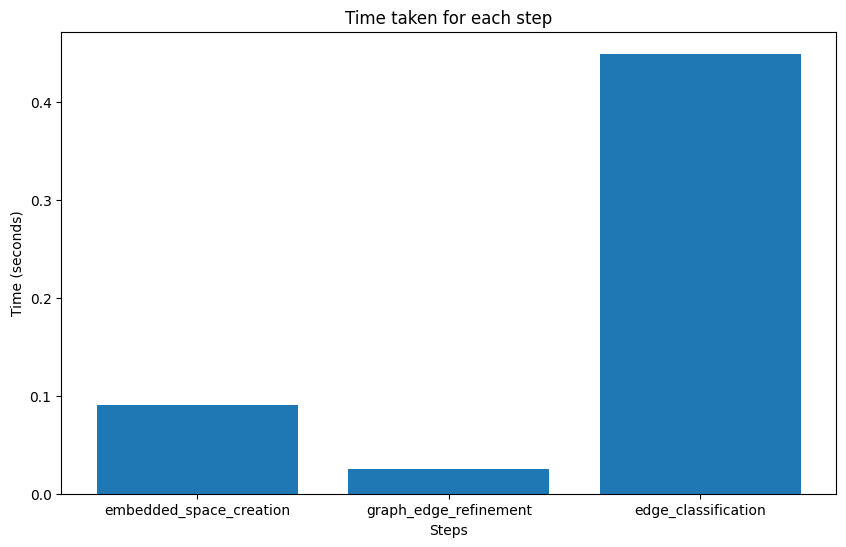

Total execution time: 0.80 seconds


In [35]:
import time as ti
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
from sklearn.cluster import DBSCAN
import os
import networkx as nx
import pickle
from torch.utils.data import DataLoader, TensorDataset
from collections import defaultdict

# Start timing the entire process
start_time = ti.time()

# Timing dictionary to store times for each step
timing = {
    'embedded_space_creation': 0,
    'graph_edge_refinement': 0,
    'edge_classification': 0
}

# Step 1: Embedded space creation
step_start_time = ti.time()

chunk_size = 1000
data_chunks = pd.read_csv(file_path1, chunksize=chunk_size, delimiter='\t')

# Initialize an empty list to store chunks after processing
processed_chunks = []

# Process each chunk and assign unique HitID
for chunk in data_chunks:
    if not chunk.empty:
        # Generate unique HitID based on index
        chunk['HitID'] = chunk.index + 1
        # Append processed chunk to the list
        processed_chunks.append(chunk)

data = pd.concat(processed_chunks, ignore_index=True)
data.to_csv("/kaggle/working/processed_data_with_hitid.csv", index=False)

updated_graphs_dir = '/kaggle/working/updated_final_dbs'
track_hits_file = '/kaggle/working/track_hits_dbs.csv'
os.makedirs(updated_graphs_dir, exist_ok=True)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, nb_hidden, nb_layer, input_dim, mean, std, emb_dim=2):
        super(MLP, self).__init__()
        layers = [nn.Linear(input_dim, nb_hidden)]
        ln = [nn.Linear(nb_hidden, nb_hidden) for _ in range(nb_layer-1)]
        layers.extend(ln)
        self.layers = nn.ModuleList(layers)
        self.emb_layer = nn.Linear(nb_hidden, emb_dim)
        self.act = nn.ReLU()
        self.mean = torch.FloatTensor(mean).to(torch.float)
        self.std = torch.FloatTensor(std).to(torch.float)

    def forward(self, hits):
        hits = self.normalize(hits)
        for l in self.layers:
            hits = l(hits)
            hits = self.act(hits)
        hits = self.emb_layer(hits)
        return hits

    def normalize(self, hits):
        min_vals = torch.min(hits, dim=1, keepdim=True)[0]
        max_vals = torch.max(hits, dim=1, keepdim=True)[0]
        hits = (hits - min_vals) / (max_vals - min_vals + 1e-10)  # Avoid division by zero
        return hits

input_dim = 4
nb_hidden = 256
nb_layer = 4
emb_dim = 4
mean = [0, 0, 0, 0]
std = [1, 1, 1, 1]
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

net = MLP(nb_hidden, nb_layer, input_dim, mean, std, emb_dim).to(DEVICE)
net.load_state_dict(torch.load(model_path, map_location=DEVICE))  # Change this to your actual model path

raw_data = pd.read_csv('/kaggle/working/processed_data_with_hitid.csv')
raw_tensor = torch.tensor(raw_data[['pos_x', 'pos_y', 'pos_z', 'time']].values, dtype=torch.float32).to(DEVICE)
dataset = TensorDataset(raw_tensor)
batch_size = 256
raw_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

processed_data = pd.read_csv('/kaggle/working/processed_data_with_hitid.csv')

muon_ids = processed_data['muonID'].values  # Extract muonIDs
Hit_ids = processed_data['HitID'].values  # Extract HitIDs

net.eval()
embeddings = []

with torch.no_grad():
    for batch_data in raw_loader:
        batch_data = batch_data[0].to(DEVICE)
        emb_points = net(batch_data)
        embeddings.append(emb_points.cpu().numpy())

all_embeddings = np.concatenate(embeddings, axis=0)
np.save('/kaggle/working/all_embeddings.npy', all_embeddings)

np.save('/kaggle/working/all_embeddings.npy', all_embeddings)


np.save('/kaggle/working/muon_ids.npy', muon_ids)
np.save('/kaggle/working/Hit_ids.npy', Hit_ids)

timing['embedded_space_creation'] = ti.time() - step_start_time

# Step 2: Graph edge refinement
step_start_time = ti.time()

epsilon = 0.000005                  #adjust the epsilon value and see the difference
hit_ids = raw_data['HitID'].values
positions = all_embeddings[:, :3]

def apply_dbscan(positions):
    dbscan = DBSCAN(eps=epsilon, min_samples=3)
    labels = dbscan.fit_predict(positions)
    return labels

def process_clusters(labels):
    clusters = defaultdict(list)
    for i, label in enumerate(labels):
        clusters[label].append(hit_ids[i])

    cluster_graphs = []
    for cluster_id, cluster_hits in clusters.items():
        if len(cluster_hits) > 1:
            G = nx.Graph()
            for hit_id in cluster_hits:
                G.add_node(hit_id, color='blue')
            cluster_graphs.append(G)
        else:
            print(f"Cluster {cluster_id} has only {len(cluster_hits)} node(s), not saving as a graph.")
    return cluster_graphs

labels = apply_dbscan(positions)
cluster_graphs = process_clusters(labels)

def save_graph_with_scores(graph, updated_graphs_dir, edge_scores, graph_name):
    graph_file = f'{graph_name}_with_scores.pkl'
    for (u, v), score in edge_scores.items():
        if graph.has_edge(u, v):
            graph[u][v]['score'] = score
    with open(os.path.join(updated_graphs_dir, graph_file), 'wb') as f:
        pickle.dump(graph, f)

timing['graph_edge_refinement'] = ti.time() - step_start_time

# Step 3: Edge classification
step_start_time = ti.time()

class EdgeNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(EdgeNetwork, self).__init__()
        self.edge_mlp = nn.Sequential(
            nn.Linear(2 * input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, hi, hj):
        concatenated = torch.cat((hi, hj), dim=-1)
        return self.edge_mlp(concatenated)

class NodeNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NodeNetwork, self).__init__()
        self.node_mlp = nn.Sequential(
            nn.Linear(3 * input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, h_in, s_in, h_out):
        return self.node_mlp(torch.cat((s_in * h_in, s_in * h_out, h_in), dim=-1)) + h_in

class GNN(nn.Module):
    def __init__(self, edge_in_dim, edge_hidden_dim, edge_out_dim,
                 node_in_dim, node_hidden_dim, node_out_dim, n_iter):
        super(GNN, self).__init__()
        self.edge_network = EdgeNetwork(edge_in_dim, edge_hidden_dim, edge_out_dim)
        self.node_network = NodeNetwork(node_in_dim, node_hidden_dim, node_out_dim)
        self.n_iter = n_iter

    def forward(self, node_features, edge_indices):
        for _ in range(self.n_iter):
            new_node_features = {}
            for node_id, neighbors in edge_indices.items():
                h_in = node_features[node_id]
                s_in = []
                for neighbor_id in neighbors:
                    h_out = node_features[neighbor_id]
                    s_in.append(self.edge_network(h_in, h_out))
                if s_in:
                    s_in = torch.stack(s_in, dim=0)
                    new_node_features[node_id] = self.node_network(h_in, s_in.mean(dim=0), h_out)
                else:
                    new_node_features[node_id] = h_in
            node_features = new_node_features
        return node_features

model = GNN(edge_in_dim=4, edge_hidden_dim=64, edge_out_dim=1, node_in_dim=4, node_hidden_dim=64, node_out_dim=4, n_iter=2).to(DEVICE)
model.load_state_dict(torch.load(model_gnn))  # Change this to your actual model path
model.eval()

node_features = {row['HitID']: torch.tensor([row['pos_x'], row['pos_y'], row['pos_z'], row['time']], dtype=torch.float32).to(DEVICE) for index, row in raw_data.iterrows()}
all_edge_scores = {}
track_hits = []

for i, G in enumerate(cluster_graphs):
    edge_indices = {node: list(G.neighbors(node)) for node in G.nodes}
    outputs = model(node_features, edge_indices)
    edge_scores = {}
    for node_id, neighbors in edge_indices.items():
        h_in = outputs[node_id]
        for neighbor_id in neighbors:
            h_out = outputs[neighbor_id]
            edge_score = model.edge_network(h_in, h_out)
            edge_score = torch.sigmoid(edge_score).item()
            edge_scores[(node_id, neighbor_id)] = edge_score
    all_edge_scores[i] = edge_scores
    save_graph_with_scores(G, updated_graphs_dir, edge_scores, f'graph_{i + 1}')
    track_hits.append({'track_number': i + 1, 'points': list(G.nodes)})

print(f'Updated graphs with edge scores saved to {updated_graphs_dir}')

# Save track hits to CSV
track_hits_df = pd.DataFrame(track_hits)
track_hits_df.to_csv(track_hits_file, index=False)
print(f'Track hits saved to {track_hits_file}')

timing['edge_classification'] = ti.time() - step_start_time

# Save the results as needed

# Print the timing results
for step, duration in timing.items():
    print(f"{step}: {duration:.2f} seconds")

plt.figure(figsize=(10, 6))
plt.bar(timing.keys(), timing.values())
plt.xlabel('Steps')
plt.ylabel('Time (seconds)')
plt.title('Time taken for each step')
plt.show()

end_time = ti.time()
execution_time = end_time - start_time
print(f"Total execution time: {execution_time:.2f} seconds")


In [36]:
tracks = pd.read_csv('/kaggle/working/track_hits_dbs.csv')
tracks

,track_number,points
0,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,2,"[1198, 1199, 1528]"
2,3,"[2398, 2408, 3730]"
3,4,"[2407, 2417, 3738]"
4,5,"[3333, 3334, 3335, 3336, 3337, 3338, 3339, 334..."
5,6,"[3345, 3346, 3347, 3348, 3349, 3350, 3351, 335..."
6,7,"[3357, 3358, 3359, 3360, 3361, 3362, 3363, 336..."
7,8,"[3369, 3370, 3371, 3372, 3373, 3374, 3375, 337..."
8,9,"[3381, 3382, 3383, 3384, 3385, 3386, 3387, 338..."
9,10,"[3393, 3394, 3395, 3396, 3397, 3398, 3399, 340..."


   muonID     time    pos_x    pos_y   pos_z  HitID
0       7  20680.0  165.423  26.2004 -65.560      1
1      64    425.0  148.627  23.5403 -61.760      2
2      90   1235.0  167.487  26.5274 -53.476      3
3      90   1232.5  167.300  26.4977 -53.476      4
4      90   1235.0  167.112  26.4679 -53.476      5


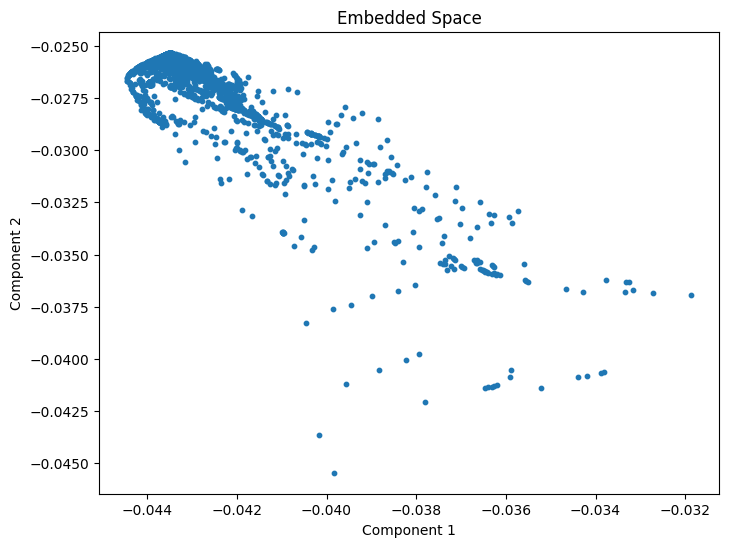

Number of graphs saved: 3780
Min-max normalization applied to features: ['pos_z', 'time']
Model loaded successfully.
Node features prepared successfully.
First 5 Edge Scores:
Graph 1:
  Edge (15, 1884): Score 0.6657628417015076
  Edge (15, 48): Score 0.5429306030273438
  Edge (15, 1581): Score 0.6052185297012329
  Edge (15, 1176): Score 0.6168540716171265
  Edge (1884, 15): Score 0.6219788193702698
Graph 2:
  Edge (2714, 2715): Score 0.4313199818134308
  Edge (2714, 2718): Score 0.43045616149902344
  Edge (2715, 2714): Score 0.4324605166912079
  Edge (2718, 2714): Score 0.45107609033584595
Graph 3:
  Edge (2371, 2374): Score 0.47702863812446594
  Edge (2371, 2375): Score 0.47702863812446594
  Edge (2371, 2380): Score 0.47702863812446594
  Edge (2371, 2386): Score 0.47702863812446594
  Edge (2371, 2376): Score 0.47702863812446594
Graph 4:
  Edge (1086, 1087): Score 0.5611374974250793
  Edge (1086, 1351): Score 0.5358096957206726
  Edge (1087, 1086): Score 0.5284957885742188
  Edge (1351

In [37]:
########################################
#    Query ball based algorithm      #
#######################################

import time as ti
start_time = ti.time()
from scipy.sparse import csr_matrix

###   embedded space creation   ####
chunk_size = 1000  
data_chunks = pd.read_csv(file_path1, chunksize=chunk_size, delimiter = '\t')#, delimiter = '\t'

# Initialize an empty list to store chunks after processing
processed_chunks = []

# Process each chunk and assign unique HitID

for chunk in data_chunks:
    # Filter rows with muonID not equal to -999
#     chunk = chunk[chunk['muonID'] != -999]

    if not chunk.empty:
        # Generate unique HitID based on index
        chunk['HitID'] = chunk.index + 1

        # Append processed chunk to the list
        processed_chunks.append(chunk)

data = pd.concat(processed_chunks, ignore_index=True)

data.to_csv("/kaggle/working/processed_data_with_hitid1.csv", index=False)

print(data.head())

####  All the classes and definitions  ####

class MLP(nn.Module):
    def __init__(self,
                 nb_hidden,
                 nb_layer,
                 input_dim,
                 mean,
                 std,
                 emb_dim=2):
        super(MLP, self).__init__()
        layers = [nn.Linear(input_dim, nb_hidden)]
        ln = [nn.Linear(nb_hidden, nb_hidden) for _ in range(nb_layer-1)]
        layers.extend(ln)
        self.layers = nn.ModuleList(layers)
        self.emb_layer = nn.Linear(nb_hidden, emb_dim)
        self.act = nn.ReLU()
        self.mean = torch.FloatTensor(mean).to(torch.float)
        self.std = torch.FloatTensor(std).to(torch.float)

    def forward(self, hits):
        hits = self.normalize(hits)
        for l in self.layers:
            hits = l(hits)
            hits = self.act(hits)
            # hits = self.dropout(hits)
        hits = self.emb_layer(hits)
        return hits

#     def normalize(self, hits):

#         return hits
    def normalize(self, hits):
        min_vals = torch.min(hits, dim=1, keepdim=True)[0]
        max_vals = torch.max(hits, dim=1, keepdim=True)[0]
        hits = (hits - min_vals) / (max_vals - min_vals + 1e-10)  # Avoid division by zero
        return hits

#score calculation: correctly predicted labels/total labels

def score_dist_accuracy(pred, true):
    pred_classes = torch.ones_like(pred)  # Initialize all predictions as 1
    pred_classes[pred >= 0.1] = -1 
    correct = pred_classes == true
    nb_correct = correct.sum().item()
    nb_total = true.size(0)
    score = nb_correct / nb_total
    return score

####################
#     PRINTING     #
####################
def print_header():
  '''
  Print header before train / evaluation run.
  '''
  logging.info("         Loss  Score")

def print_eval_stats(nb_processed, loss, score):
  '''
  Log stats during train, evaluation run.
  '''
  logging.info("  {:5d}: {:.3f}  {:2.2f}".format(nb_processed, loss, score))


#defining all the necessary functions

def track_epoch_stats(epoch_nb, lrate, train_stats, val_stats, experiment_dir):
    print("Epoch: {}".format(epoch_nb))
    print("Learning rate: {:.3g}".format(lrate))
    print("Train loss: {:.3f}".format(train_stats[0]))
    print("Train score: {:.2f}".format(train_stats[1]))
    print("Validation loss: {:.3f}".format(val_stats[0]))
    print("Validation score: {:.2f}".format(val_stats[1]))
    print()
def save_test_stats(experiment_dir, test_stats):
    stats = {'loss': test_stats[0],
             'dist_accuracy': test_stats[1]}
    stats_file = os.path.join(experiment_dir, TEST_STATS_FILE)
    with open(stats_file, 'w') as f:
        yaml.dump(stats, f, default_flow_style=False)
        
def print_header():
    '''
    Print header before train / evaluation run.
    '''
    print("         Loss  Score")

def print_eval_stats(nb_processed, loss, score):
    '''
    Log stats during train, evaluation run.
    '''
    print("  {:5d}: {:.3f}  {:2.2f}".format(nb_processed, loss, score))


def main(args, force=False):

  experiment_dir = os.path.join(args.artifact_storage_path, 'metric_learning_emb')
  
  load_path = os.path.join(args.data_storage_path, 'metric_stage_1')
    
  # Maybe return previously trained model
  best_net_name = os.path.join(experiment_dir, 'best_model.pkl')
  if os.path.isfile(best_net_name) and (not force):
    net = load_model(best_net_name)
    if not force:
      print("Best model loaded from previous run. Not forcing training.")
      return net

  utils.initialize_experiment_if_needed(experiment_dir, evaluate_only=False)

  train_path = os.path.join(load_path, 'train.pickle')
  valid_path = os.path.join(load_path, 'valid.pickle')
  test_path  = os.path.join(load_path, 'test.pickle')
  stats_path = os.path.join(load_path, 'stats.yml')

  train_data = Hit_Pair_Dataset(train_path, 10**8)
  valid_data = Hit_Pair_Dataset(valid_path, 10**8)
  test_data  = Hit_Pair_Dataset(test_path, 10**8)


  train_dataloader = DataLoader(train_dataset,
                                batch_size=args.batch_size,
                                shuffle=True,
                                drop_last=True,
                                pin_memory=True,
                                num_workers=8)
  valid_dataloader = DataLoader(valid_dataset,
                                batch_size=args.batch_size,
                                drop_last=True,
                                pin_memory=True,
                                num_workers=8)
  test_dataloader  = DataLoader(test_dataset,
                                batch_size=args.batch_size,
                                drop_last=True,
                                pin_memory=True,
                                num_workers=8)

  net = create_or_restore_model(
                                    experiment_dir, 
                                    train_dataset.get_dim(),
                                    args.nb_hidden, 
                                    args.nb_layer,
                                    args.emb_dim,
                                    stats_path
                                    )
  net.to(DEVICE)
  if next(net.parameters()).is_cuda:
    logging.warning("Working on GPU")
    logging.info("GPU type:\n{}".format(torch.cuda.get_device_name(0)))
  else:
    logging.warning("Working on CPU")
    
  train(net,
        args.lr_start,
        args.batch_size,
        args.max_nb_epochs,
        experiment_dir,
        train_dataloader,
        valid_dataloader)

  # Perform evaluation over test set
  try:
    net = load_best_model(experiment_dir).to(DEVICE)
    logging.warning("\nBest model loaded for evaluation on test set.")
  except:
    logging.warning("\nCould not load best model for test set. Using current.")
  test_stats = evaluate(net, experiment_dir, args.batch_size, test_dataloader, TEST_NAME)
  utils.save_test_stats(experiment_dir, test_stats)
  logging.info("Test score:  {:3.2f}".format(test_stats[1]))

  return net

input_dim = 4
nb_hidden = 256
nb_layer = 4
emb_dim = 4
mean = [0, 0, 0, 0]
std = [1, 1, 1, 1]
net = MLP(nb_hidden, nb_layer, input_dim, mean, std, emb_dim)

net.to(DEVICE)

net.load_state_dict(torch.load(model_path, map_location=DEVICE))

# Now the model should be successfully loaded with the correct state dictionary

input_dim = 4
nb_hidden = 256
nb_layer = 4
emb_dim = 4
mean = [0, 0, 0, 0]
std = [1, 1, 1, 1]
net = MLP(nb_hidden, nb_layer, input_dim, mean, std, emb_dim)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(DEVICE)

# Assuming `raw_data1` is your preprocessed raw dataset (a pandas DataFrame)
raw_data = pd.read_csv('/kaggle/working/processed_data_with_hitid1.csv')
processed_data = pd.read_csv('/kaggle/working/processed_data_with_hitid1.csv')

# Drop the 'eventID' and 'muonID' columns if they exist
# columns_to_drop = ['eventID', 'muonID']
# raw_data = raw_data1.drop(columns=columns_to_drop, errors='ignore')

# Convert the DataFrame to a PyTorch tensor
# raw_tensor = torch.tensor(raw_data.values, dtype=torch.float32).to(DEVICE)  # Move tensor to the appropriate device
raw_tensor = torch.tensor(raw_data[['pos_x', 'pos_y', 'pos_z', 'time']].values, dtype=torch.float32).to(DEVICE)

# Create a PyTorch Dataset from the tensor
dataset = TensorDataset(raw_tensor)

# Create a DataLoader for the raw dataset
batch_size = 256  # Adjust batch size based on your dataset and computational resources
raw_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Set the model to evaluation mode
net.eval()

raw_tensor = torch.tensor(processed_data[['pos_x', 'pos_y', 'pos_z', 'time']].values, dtype=torch.float32)
muon_ids = processed_data['muonID'].values  # Extract muonIDs
Hit_ids = processed_data['HitID'].values  # Extract HitIDs

embeddings = []  # List to store the embeddings
distances = []  # List to store the distances

with torch.no_grad():
    for batch_data in raw_loader:
        batch_data = batch_data[0].to(DEVICE)  
        # Calculate embeddings
        emb_points = net(batch_data)
        # Append embeddings to list
        embeddings.append(emb_points.cpu().numpy())
        # Calculate pairwise distances
        pairwise_dist = torch.cdist(emb_points, emb_points, p=2)
        # Append distances to list
        distances.append(pairwise_dist.cpu().numpy())

all_embeddings = np.concatenate(embeddings, axis=0)

max_size = max(arr.shape[0] for arr in distances)

padded_distances = [np.pad(arr, ((0, max_size - arr.shape[0]), (0, max_size - arr.shape[1])), mode='constant') for arr in distances]

all_distances = np.concatenate(padded_distances, axis=1)  # Concatenate along axis 1

np.save('/kaggle/working/all_embeddings1.npy', all_embeddings)
np.save('/kaggle/working/all_distances1.npy', all_distances)

np.save('/kaggle/working/muon_ids1.npy', muon_ids)
np.save('/kaggle/working/Hit_ids1.npy', Hit_ids)

plt.figure(figsize=(8, 6))
plt.scatter(all_embeddings[:, 2], all_embeddings[:, 3], s=10)
plt.title("Embedded Space")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

######graph and edge refinement ########

# embedded_points_table = pd.DataFrame({
#     'Index': range(len(all_embeddings)),  # Point indices
#     'muonID': muon_ids,  # muonID for each point
#     'HitID': Hit_ids,  # HitID for each point
#     'Embedded Point': [point.tolist() for point in all_embeddings] 
# })

# print(embedded_points_table)

# embedded_points_table.to_csv('embedded_points_table', index= False)

epsilon = 0.5
batch_size = 100 
processed_data = pd.read_csv('/kaggle/working/processed_data_with_hitid1.csv')

positions = processed_data[['pos_z', 'time']].values
hit_indices = processed_data['HitID'].values

neigh = NearestNeighbors(radius=epsilon, algorithm='ball_tree').fit(positions)

all_embeddings = np.load('/kaggle/working/all_embeddings1.npy')
hit_ids = np.load('/kaggle/working/Hit_ids1.npy')

all_embeddings = torch.tensor(all_embeddings, dtype=torch.float32).cuda()

if not os.path.exists('graphs1'):
    os.makedirs('graphs1')


processed_hit_ids = set()

def process_batch(batch_query_hit_ids, query_indices):
    batch_graphs = []
    query_positions = processed_data.loc[processed_data['HitID'].isin(batch_query_hit_ids), ['pos_z', 'time']].values
    neighbor_indices = neigh.radius_neighbors(query_positions, return_distance=False)
    
    for query_hit_id, query_idx, neighbors in zip(batch_query_hit_ids, query_indices, neighbor_indices):
        if query_hit_id in processed_hit_ids:
            continue  # Skip already processed points
        
        query_point = all_embeddings[query_idx].cpu().numpy()
        query_z, query_time = positions[query_idx]
        
        valid_neighbors = []
        for neighbor_idx in neighbors:
            if neighbor_idx == query_idx:
                continue
                
            neighbor_hit_id = hit_indices[neighbor_idx]
            if neighbor_hit_id in processed_hit_ids:  
                continue
            
            neighbor_z, neighbor_time = positions[neighbor_idx]
            z_diff_sqr = (query_z - neighbor_z) ** 2
            time_diff_sqr = (query_time - neighbor_time) ** 2
            
            z_prob = 1 / (1 + torch.exp(-100 * torch.tensor(z_diff_sqr, dtype=torch.float32, device='cuda')))
            time_prob = 1 / (1 + torch.exp(-1 * torch.tensor(time_diff_sqr, dtype=torch.float32, device='cuda')))
            prob = z_prob * time_prob
            
            if prob <= 0.65:
                valid_neighbors.append(neighbor_hit_id)
                processed_hit_ids.add(neighbor_hit_id)  # Mark as processed
                
        if len(valid_neighbors) >= 2:
            G = nx.Graph()
            G.add_node(query_hit_id, color='blue')  
            for neighbor_hit_id in valid_neighbors:
                G.add_node(neighbor_hit_id, color='red')  
                G.add_edge(query_hit_id, neighbor_hit_id) 
            batch_graphs.append((query_hit_id, G))
            processed_hit_ids.add(query_hit_id)  # Mark the query point as processed
    
    return batch_graphs

if not os.path.exists('graphs1'):
    os.makedirs('graphs1')

batch_size = 100
num_graphs_saved = 0

with torch.no_grad(), ThreadPoolExecutor() as executor:
    for batch_start_idx in range(0, len(hit_ids), batch_size):
        batch_query_hit_ids = hit_ids[batch_start_idx:batch_start_idx + batch_size]
        batch_query_indices = np.where(np.isin(hit_ids, batch_query_hit_ids))[0]
        
        batch_graphs = process_batch(batch_query_hit_ids, batch_query_indices)
        num_graphs_saved += len(batch_query_hit_ids)
        
        for graph in batch_graphs:
            query_hit_id, G = graph
            executor.submit(pickle.dump, G, open(f'graphs1/Graph_{query_hit_id}.pkl', 'wb'))

print(f"Number of graphs saved: {num_graphs_saved}")

### edge classification  ###

graphs_dir = '/kaggle/working/graphs1'
updated_graphs_dir = '/kaggle/working/updated_final1'
track_hits_file = '/kaggle/working/track_hits1.csv'
os.makedirs(updated_graphs_dir, exist_ok=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

features = ['pos_z', 'time']
for feature in features:
    min_value = processed_data[feature].min()
    max_value = processed_data[feature].max()
    processed_data[feature] = (processed_data[feature] - min_value) / (max_value - min_value)

print("Min-max normalization applied to features:", features)

def load_graphs(graphs_dir):
    graphs = []
    graph_files = [f for f in os.listdir(graphs_dir) if f.endswith('.pkl')]
    for graph_file in graph_files:
        with open(os.path.join(graphs_dir, graph_file), 'rb') as f:
            G = pickle.load(f)
            graphs.append(G)
    return graphs

graphs = load_graphs(graphs_dir)

def save_graph_with_scores(graph, updated_graphs_dir, edge_scores, graph_name):
    graph_file = f'{graph_name}_with_scores.pkl'
    for (u, v), score in edge_scores.items():
        if graph.has_edge(u, v):
            graph[u][v]['score'] = score
    with open(os.path.join(updated_graphs_dir, graph_file), 'wb') as f:
        pickle.dump(graph, f)

class EdgeNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(EdgeNetwork, self).__init__()
        self.edge_mlp = nn.Sequential(
            nn.Linear(2 * input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, hi, hj):
        concatenated = torch.cat((hi, hj), dim=-1)
        return self.edge_mlp(concatenated)

class NodeNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NodeNetwork, self).__init__()
        self.node_mlp = nn.Sequential(
            nn.Linear(3 * input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, h_in, s_in, h_out):
        return self.node_mlp(torch.cat((s_in * h_in, s_in * h_out, h_in), dim=-1)) + h_in

class GNN(nn.Module):
    def __init__(self, edge_in_dim, edge_hidden_dim, edge_out_dim,
                 node_in_dim, node_hidden_dim, node_out_dim, n_iter):
        super(GNN, self).__init__()
        self.edge_network = EdgeNetwork(edge_in_dim, edge_hidden_dim, edge_out_dim)
        self.node_network = NodeNetwork(node_in_dim, node_hidden_dim, node_out_dim)
        self.n_iter = n_iter
    def forward(self, node_features, edge_indices):
        for _ in range(self.n_iter):
            new_node_features = {}
            for node_id, neighbors in edge_indices.items():
                h_in = node_features[node_id]
                s_in = []
                for neighbor_id in neighbors:
                    h_out = node_features[neighbor_id]
                    s_in.append(self.edge_network(h_in, h_out))
                if s_in:
                    s_in = torch.stack(s_in, dim=0)
                    new_node_features[node_id] = self.node_network(h_in, s_in.mean(dim=0), h_out)
                else:
                    new_node_features[node_id] = h_in
            node_features = new_node_features
        return node_features

node_input_dim = 4
model = GNN(edge_in_dim=node_input_dim,
            edge_hidden_dim=64,
            edge_out_dim=1,
            node_in_dim=node_input_dim,
            node_hidden_dim=64,
            node_out_dim=node_input_dim,
            n_iter=2)

model.to(device)
model.load_state_dict(torch.load(model_gnn, map_location=device))
model.eval()
print("Model loaded successfully.")

node_features = {}
for index, row in processed_data.iterrows():
    hit_id = row['HitID']
    pos_x = row['pos_x']
    pos_y = row['pos_y']
    pos_z = row['pos_z']
    time = row['time']
    node_features[hit_id] = torch.tensor([pos_x, pos_y, pos_z, time], dtype=torch.float32)

node_features = {k: v.to(device) for k, v in node_features.items()}
print("Node features prepared successfully.")

hitid_to_muonid = processed_data.set_index('HitID')['muonID'].to_dict()

def create_distance_matrix(edge_scores, num_nodes):
    rows = []
    cols = []
    data = []
    
    for (u, v), score in edge_scores.items():
        if u < num_nodes and v < num_nodes:
            rows.append(u)
            cols.append(v)
            data.append(1 - 2*score)  # distance = 1 - score
    
    distance_matrix = csr_matrix((data, (rows, cols)), shape=(num_nodes, num_nodes))
    distance_matrix = (distance_matrix + distance_matrix.T) / 2  # Symmetrize matrix
    return distance_matrix

def apply_dbscan(distance_matrix, eps=0.005):
    dbscan = DBSCAN(eps=eps, metric='precomputed', min_samples=1)
    labels = dbscan.fit_predict(distance_matrix)
    return labels

all_edge_scores = {}
track_hits = {}  # Dictionary to aggregate points and muonIDs by track label
graph_hits = []

for i, G in enumerate(graphs):
    edge_indices = {node: list(G.neighbors(node)) for node in G.nodes}
    outputs = model(node_features, edge_indices)
    edge_scores = {}
    for node_id, neighbors in edge_indices.items():
        h_in = outputs[node_id]
        for neighbor_id in neighbors:
            h_out = outputs[neighbor_id]
            edge_score = model.edge_network(h_in, h_out)
            edge_score = torch.sigmoid(edge_score).item()
            edge_scores[(node_id, neighbor_id)] = edge_score
    all_edge_scores[i] = edge_scores
    save_graph_with_scores(G, updated_graphs_dir, edge_scores, f'graph_{i + 1}')
    
    graph_hits.append({
    'track_number': i + 1,
    'points': list(G.nodes),
    'muonIDs': [hitid_to_muonid[hit_id] for hit_id in G.nodes]
    })
    
    num_nodes = len(G.nodes)
    distance_matrix = create_distance_matrix(all_edge_scores[i], num_nodes)
    labels = apply_dbscan(distance_matrix, eps=0.1)  # Adjust eps as needed
    
    # Aggregate points and muonIDs by track label
    for j, node in enumerate(G.nodes):
        label = labels[j]
        if label not in track_hits:
            track_hits[label] = {'points': [], 'muonIDs': []}
        track_hits[label]['points'].append(node)
        track_hits[label]['muonIDs'].append(hitid_to_muonid.get(node, None))

track_hits_list = [{
    'track_label': label,
    'points': data['points'],
    'muonIDs': data['muonIDs']
} for label, data in track_hits.items()]

# Print the first 5 edge scores
print("First 5 Edge Scores:")
for i, edge_scores in list(all_edge_scores.items())[:5]:
    print(f"Graph {i + 1}:")
    for (node_pair, score) in list(edge_scores.items())[:5]:
        print(f"  Edge {node_pair}: Score {score}")


track_hits_df = pd.DataFrame(track_hits_list)

track_hits_df['points'] = track_hits_df['points'].apply(lambda x: str(x))
track_hits_df['muonIDs'] = track_hits_df['muonIDs'].apply(lambda x: str(x))

graph_hits_df = pd.DataFrame(graph_hits)
graph_hits_df.to_csv(graphs_hits_file, index=False)

track_hits_df.to_csv(track_hits_file, index=False)
print(f'Track hits saved to {track_hits_file}')


In [40]:
tracks = pd.read_csv('/kaggle/working/graph_hits.csv')
tracks

,track_number,points,muonIDs
0,1,"[15, 1884, 48, 1581, 1176]","[59, 59, 59, 59, 59]"
1,2,"[2714, 2715, 2718]","[49, 49, 49]"
2,3,"[2371, 2374, 2375, 2380, 2386, 2376, 2381, 2382]","[80, 80, 80, 80, 80, 80, 80, 80]"
3,4,"[1086, 1087, 1351]","[4, 4, 4]"
4,5,"[2793, 2795, 2796]","[-999, -999, -999]"
...,...,...,...
593,594,"[1629, 1632, 1631, 1630]","[93, 93, 93, 93]"
594,595,"[1032, 1033, 1035, 1034, 1496, 1036, 1866, 186...","[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3..."
595,596,"[1690, 2024, 2023]","[83, 83, 83]"
596,597,"[498, 499, 501, 500, 3160, 3162, 3161, 3163, 3...","[-999, -999, -999, -999, -999, -999, -999, -99..."


In [39]:
graphs = pd.read_csv('/kaggle/working/track_hits1.csv')
graphs

,track_label,points,muonIDs
0,0,"[15, 2714, 2371, 1086, 2793, 3086, 1016, 610, ...","[59, 49, 80, 4, -999, 78, 16, 26, 49, 83, 19, ..."
1,1,"[1884, 2715, 2374, 1087, 2795, 3189, 1220, 904...","[59, 49, 80, 4, -999, 78, 16, 26, 49, 83, 19, ..."
2,2,"[48, 2718, 2375, 1351, 2796, 3190, 1207, 811, ...","[59, 49, 80, 4, -999, 78, 16, 26, 49, 83, 19, ..."
3,3,"[1581, 2380, 3191, 1019, 692, 2552, 763, 570, ...","[59, 80, 78, 16, 26, 49, 19, 94, 4, 16, 32, 7,..."
4,4,"[1176, 2386, 3275, 1215, 2551, 2891, 377, 2271...","[59, 80, 78, 16, 49, 19, 94, 16, 7, 69, -999, ..."
...,...,...,...
84,84,[3423],[-999]
85,85,[3424],[-999]
86,86,[3425],[-999]
87,87,[3429],[-999]
